In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models import TiDEModel
from darts.metrics import mae
from itertools import product

d:\bachelor\BACH\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
d:\bachelor\BACH\Lib\site-packages\statsforecast\utils.py:237: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "ds": pd.date_range(start="1949-01-01", periods=len(AirPassengers), freq="M"),


In [2]:
# Load the data
df = pd.read_csv('merged_data.csv')

In [3]:
# Convert the 'DateTime' column to datetime
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [4]:
# # Set the 'DateTime' column as the index
# df.set_index('DateTime', inplace=True)

In [5]:
# Create a TimeSeries instance
series = TimeSeries.from_dataframe(df, 'DateTime', 'MeanEnergyConsumption')

In [6]:
# Get the unique years in the data
years = df['DateTime'].dt.year.unique()

In [7]:
# Initialize the lists to store the actual values and the predictions
actual_values = []
predictions = []

In [8]:
#create model
common_model_args = {
    "input_chunk_length": 48,  # lookback window
    "output_chunk_length": 7*24*2,  # forecast/lookahead window
    "likelihood": None,  # use a likelihood for probabilistic forecasts
    "save_checkpoints": True,  # checkpoint to retrieve the best performing model state,
}
model = TiDEModel(**common_model_args)

In [9]:
# Iterate over the years
for year in years[:-1]:  # Exclude the last year because it might not have a full week of data
    # Split the data into a training set and a test set
    train = series.slice(pd.Timestamp(str(year)), pd.Timestamp(str(year+1)))
    test = series.slice(pd.Timestamp(str(year+1)), pd.Timestamp(str(year+1)) + pd.DateOffset(days=7))

    # Create a TIDe model
    model = TiDEModel(**common_model_args)

    # Train the model
    model.fit(train, epochs=20)

    # Generate a 7-day forecast
    forecast = model.predict(7*24*2)  # 7 days, 24 hours per day, 2 data points per hour

    # Append the actual values and the predictions to the lists
    predictions.extend(forecast.values())
    actual_values.extend(test.values()[:len(test)])

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3060 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type             | Params
------------------------------------------------------
0 | criterion        | MSELoss          | 0     
1 | train_metrics    | MetricCollection | 0     
2 | val_metrics      | MetricCollection | 0     
3 | encoders         | Sequential       | 29.1 K
4 | decoders         | Sequential       | 1.4 M 
5 | temporal_decoder | _ResidualBlock   | 594   
6 | lookback_skip    | Linear   

Epoch 1:   9%|▊         | 4/46 [00:00<00:00, 75.48it/s, train_loss=0.00518] 

d:\bachelor\BACH\Lib\site-packages\pytorch_lightning\callbacks\model_checkpoint.py:383: `ModelCheckpoint(monitor='val_loss')` could not find the monitored key in the returned metrics: ['train_loss', 'epoch', 'step']. HINT: Did you call `log('val_loss', value)` in the `LightningModule`?


Epoch 19: 100%|██████████| 46/46 [00:00<00:00, 74.92it/s, train_loss=0.0016] 

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 46/46 [00:00<00:00, 62.33it/s, train_loss=0.0016]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 66.08it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type             | Params
------------------------------------------------------
0 | criterion        | MSELoss          | 0     
1 | train_metrics    | MetricCollection | 0     
2 | val_metrics      | MetricCollection | 0     
3 | encoders         | Sequential       | 29.1 K
4 | decoders         | Sequential       | 1.4 M 
5 | temporal_decoder | _ResidualBlock   | 594   
6 | lookback_skip    | Linear           | 16.5 K
------------------------------------------------------
1.4 M     Trainable params
0         Non-trainable params
1.4 M     Total params
5.799     Total estimated model params size (MB)



Epoch 19: 100%|██████████| 538/538 [00:06<00:00, 79.26it/s, train_loss=0.000269]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 538/538 [00:06<00:00, 78.08it/s, train_loss=0.000269]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 200.00it/s]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type             | Params
------------------------------------------------------
0 | criterion        | MSELoss          | 0     
1 | train_metrics    | MetricCollection | 0     
2 | val_metrics      | MetricCollection | 0     
3 | encoders         | Sequential       | 29.1 K
4 | decoders         | Sequential       | 1.4 M 
5 | temporal_decoder | _ResidualBlock   | 594   
6 | lookback_skip    | Linear           | 16.5 K
------------------------------------------------------
1.4 M     Trainable params
0         Non-trainable params
1.4 M     Total params
5.799     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 536/536 [00:06<00:00, 82.14it/s, train_loss=0.000285]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 536/536 [00:06<00:00, 80.97it/s, train_loss=0.000285]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 250.14it/s]


1011
1008


ValueError: x and y must be the same size

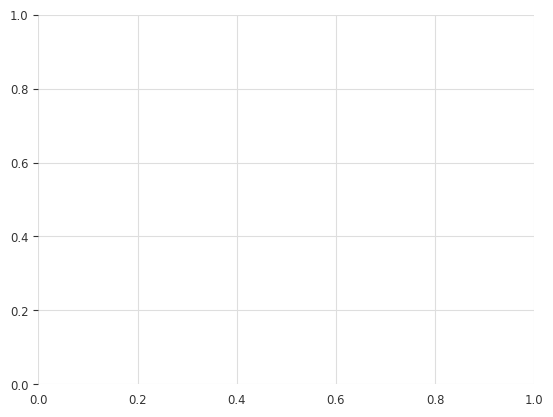

In [10]:
print(len(actual_values))
print(len(predictions))
# Create a scatter plot of the actual values and the predictions
plt.scatter(actual_values, predictions)
plt.xlabel('Actual values')
plt.ylabel('Predictions')
plt.show()

In [ ]:
# Create a TimeSeries instance for the covariates
covar = TimeSeries.from_dataframe(df, 'DateTime', ['cloud_cover'], ['sunshine_duration'])

In [ ]:
# Split the data into a training set and a validation set
train, val = series.split_after(pd.Timestamp('2014-02-21'))

## GRID SEARCH

In [ ]:
# Define the parameter grid
param_grid = {
    'input_chunk_length': [12, 24, 48],
    'output_chunk_length': [1, 7, 14],
    'epochs': [10, 20, 30]
}

In [ ]:
# Initialize the best parameters and the best score
best_params = None
best_score = float('inf')

In [ ]:
# Generate all combinations of parameters
param_combinations = list(product(*param_grid.values()))

In [ ]:
# Perform the grid search
for params in param_combinations:
    params_dict = dict(zip(param_grid.keys(), params))
    model = TiDEModel(input_chunk_length=params_dict['input_chunk_length'], output_chunk_length=params_dict['output_chunk_length'])
    model.fit(train, epochs=params_dict['epochs'], verbose=False)
    forecast = model.predict(7*24*2)  # 7 days, 24 hours per day, 2 data points per hour
    last_week = series[-7*24*2:]  # 7 days, 24 hours per day, 2 data points per hour
    score = mae(forecast, last_week)
    if score < best_score:
        best_score = score
        best_params = params_dict
        
# Print the best parameters and the best score
print('Best parameters: ', best_params)
print('Best score: ', best_score)

In [ ]:
common_model_args = {
    "input_chunk_length": 48,  # lookback window
    "output_chunk_length": 14,  # forecast/lookahead window
    "likelihood": None,  # use a likelihood for probabilistic forecasts
    "save_checkpoints": True,  # checkpoint to retrieve the best performing model state,
}

In [ ]:
# Create a TIDe model
model = TiDEModel(**common_model_args)

In [ ]:
# Train the model
model.fit(train, epochs=20, verbose=True)

In [ ]:
# Generate a 7-day forecast
forecast = model.predict(7*24*2)  # 7 days, 24 hours per day, 2 data points per hour

In [ ]:
# Slice the actual series to the last week
last_week = series[-7*24*2:]  # 7 days, 24 hours per day, 2 data points per hour

In [ ]:
# Calculate the MAE of the forecast
error = mae(forecast, last_week)

In [ ]:
print('MAE: ', error)
# Plot the forecast
last_week.plot(label='actual')
forecast.plot(label='forecast', alpha=0.5)
plt.legend()
plt.show()

In [ ]:
# Create a scatter plot
length = len(df['MeanEnergyConsumption'])
print(length)
print(len(forecast))

diff = length - len(forecast)
#copy df to a new dataframe that drops the first row
df_new = df[diff:]


print(len(forecast))
print(len(df_new['MeanEnergyConsumption']))

# Convert the forecast TimeSeries to a one-dimensional array
forecast_values = forecast.values().flatten()

# Create a scatter plot
plt.scatter(df_new['MeanEnergyConsumption'], forecast_values)

# Create a 45 degree line
max_value = max(max(df_new['MeanEnergyConsumption']), max(forecast))
plt.plot([0, max_value], [0, max_value], color='red')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

plt.show()